In [1]:
import matplotlib.pyplot as plt
from skimage.feature import hog
from skimage import data, exposure
import cv2 as cv
from scipy.spatial import distance
import os

In [2]:
pixel_size = (12, 12)

In [3]:
def DrawHog(path, size, show):
    image = cv.imread(path)
    fd, hog_image = hog(image, orientations=8, pixels_per_cell= size,
                        cells_per_block=(1, 1), visualize=True, channel_axis=-1)
    if(show):
        fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(8, 4), sharex=True, sharey=True)
        
        ax1.axis('off')
        ax1.imshow(cv.cvtColor(image, cv.COLOR_BGR2RGB), cmap=plt.cm.gray)
        ax1.set_title('Input image')
        
        hog_image_rescaled = exposure.rescale_intensity(hog_image, in_range=(0, 10))
        
        ax2.axis('off')
        ax2.imshow(hog_image_rescaled, cmap=plt.cm.gray)
        ax2.set_title('Histogram of Oriented Gradients')
        plt.show()
    return fd

def DrawHogImg(img, size):
    img = cv.cvtColor(img, cv.COLOR_BGR2GRAY)
    fd, hog_image = hog(img, orientations=8, pixels_per_cell= size,
                        cells_per_block=(1, 1), visualize=True)

    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(8, 4), sharex=True, sharey=True)

    ax1.axis('off')
    ax1.imshow(cv.cvtColor(img, cv.COLOR_BGR2RGB), cmap=plt.cm.gray)
    ax1.set_title('Input image')

    # Rescale histogram for better display
    hog_image_rescaled = exposure.rescale_intensity(hog_image, in_range=(0, 10))

    ax2.axis('off')
    ax2.imshow(hog_image_rescaled, cmap=plt.cm.gray)
    ax2.set_title('Histogram of Oriented Gradients')
    plt.show()
    return fd

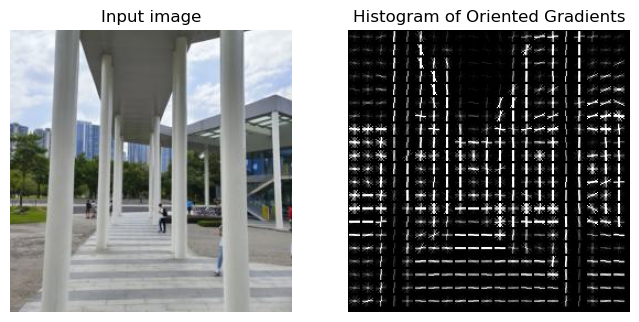

In [7]:
target = DrawHog("./dataset/img_256/16.jpg", pixel_size, True)

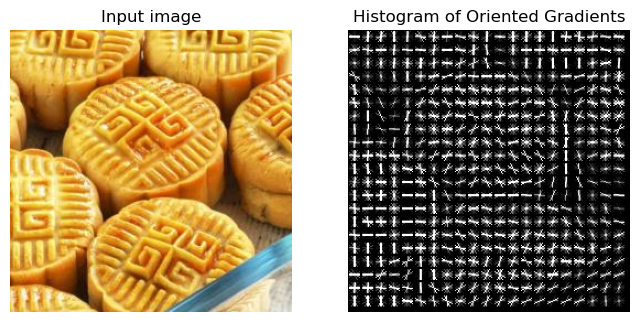

15.510275366169122
1.011011326727845


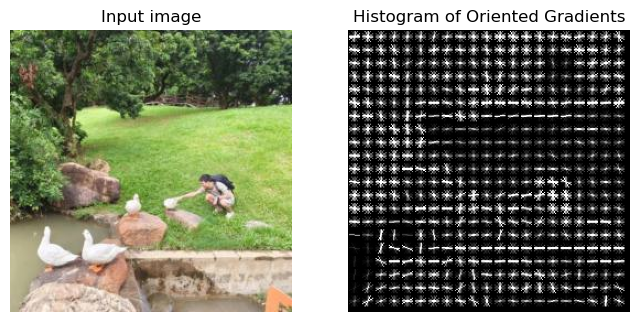

13.531687309584196
1.0339482501827963


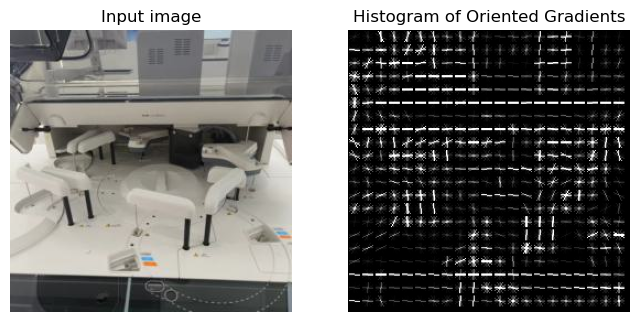

15.853688127830248
0.9650252142216098


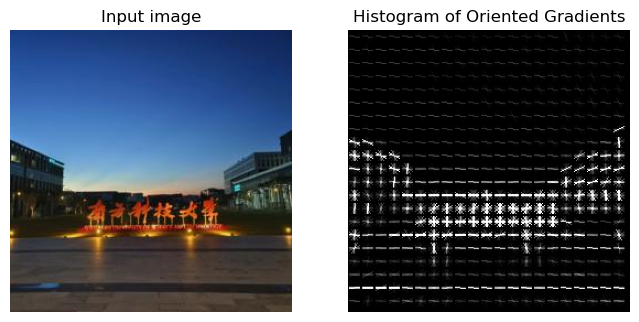

18.03771153688609
1.016699404574564


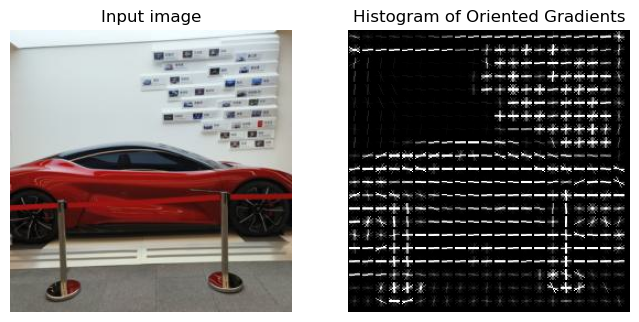

17.01587239200309
0.9182676148938901


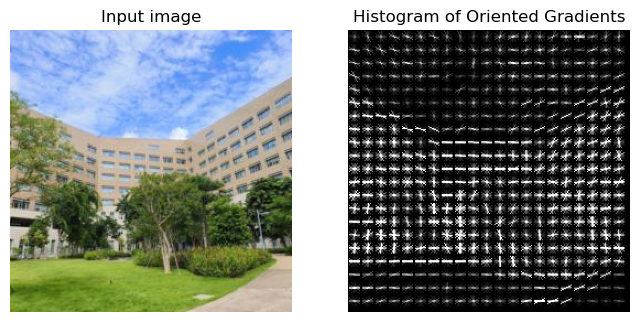

13.79137203037071
1.0019152295645675


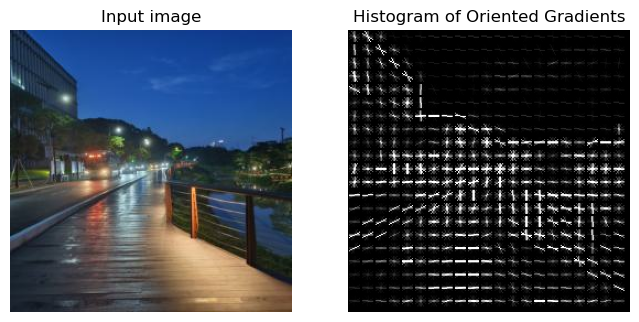

14.964030154673281
0.8950502667617142


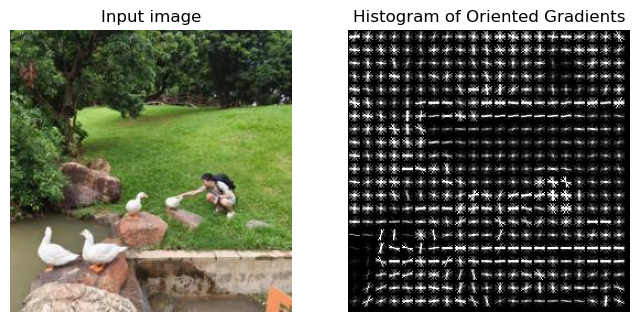

13.53684905146777
1.0241357649003708


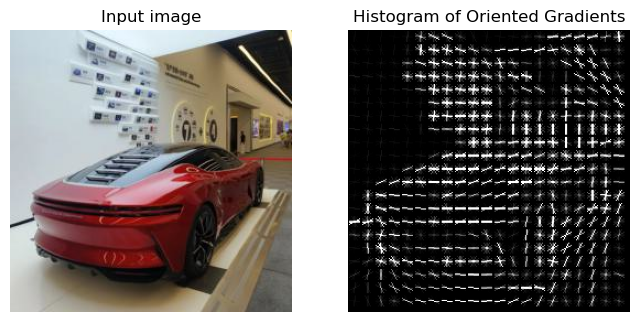

16.19572261639439
0.9518381462919046


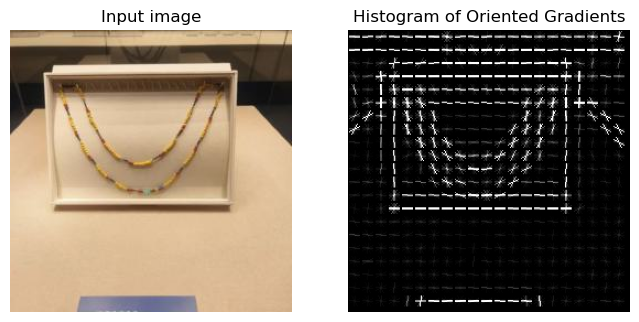

16.162903217599347
0.9178859052543598


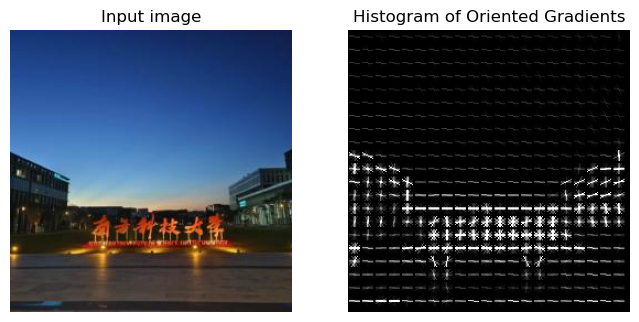

18.350155642146515
1.0340119662162859


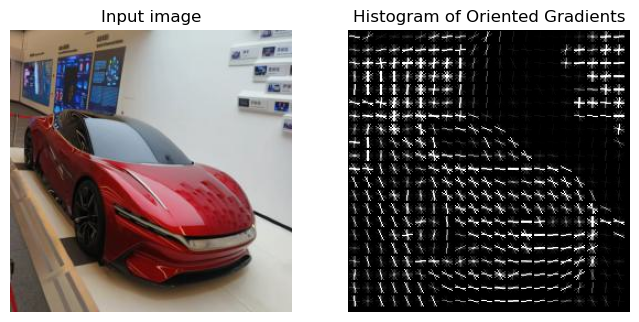

16.448960525682015
0.9483339982615545


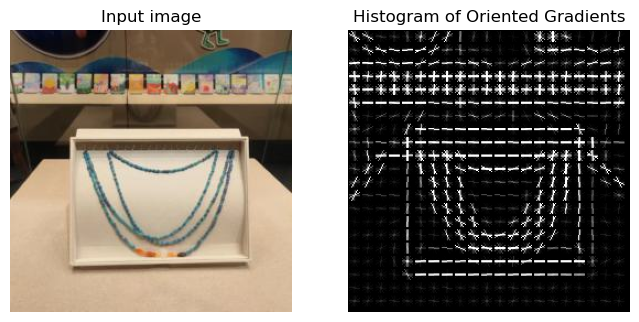

15.613075073464215
0.8946331906842536


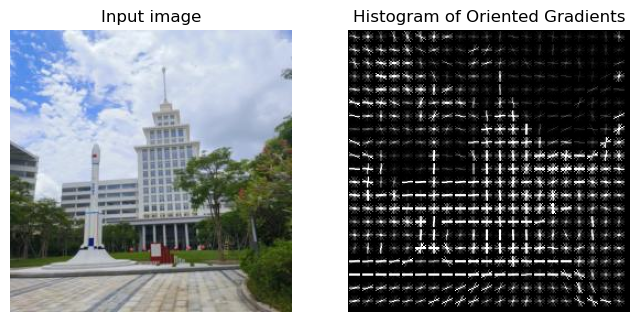

13.841893174803706
0.9258038659159049


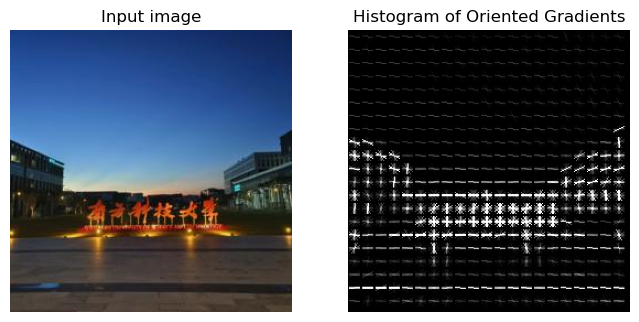

18.03771153688609
1.016699404574564


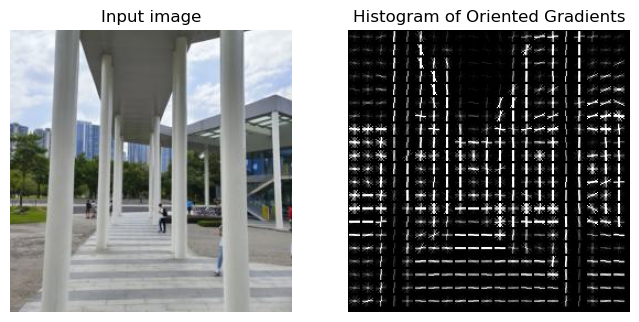

0.0
0.0


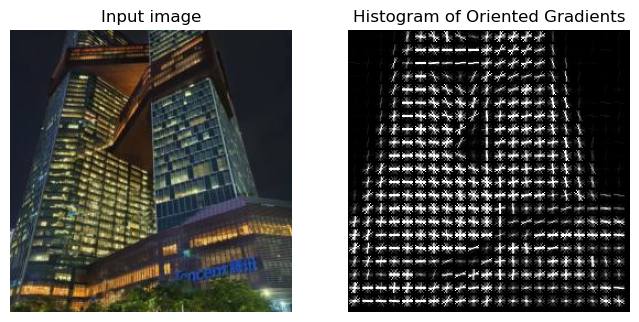

14.595722489899172
0.9564885192292334


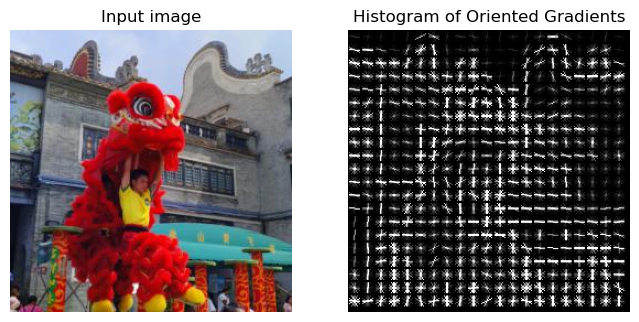

14.444318129351373
1.0014707303852086


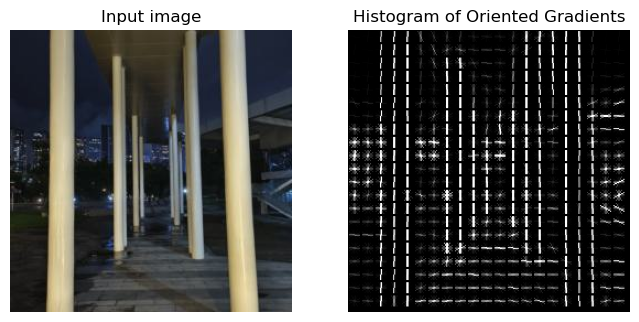

12.75164525450728
0.4849687961772826


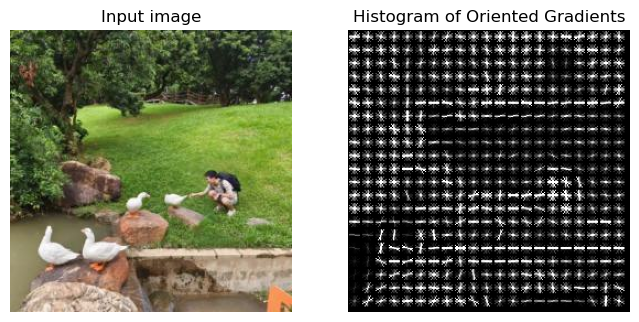

13.489329206327469
1.0274231769232158


In [5]:
filenames = os.listdir("./dataset/img_256")
filenames.sort()
for file in filenames:
    test = DrawHog("./dataset/img_256/" + file, pixel_size, True)
    print(distance.euclidean(target, test))
    print(distance.correlation(target,test))

In [6]:
for target_file in filenames:
    target_img = cv.imread("./dataset/img_256/" + target_file)
    target_img = cv.cvtColor(target_img, cv.COLOR_BGR2HSV)
    target = DrawHog("./dataset/img_256/" + target_file, pixel_size, False)
    
    for test_file in filenames:
        test_img = cv.imread("./dataset/img_256/" + test_file)
        test_img = cv.cvtColor(test_img, cv.COLOR_BGR2HSV)
        
        # Structural Similarity
        test = DrawHog("./dataset/img_256/" + test_file, pixel_size, False)
        corr = distance.correlation(target,test)
        if(0.3 < corr < 0.5):
            print("Hog Score")
            print(corr)
            print("These images are similar")
            print(target_file)
            print(test_file)
            print("=====================================")
        elif (corr < 0.3):
            if(target_file != test_file):
                print("Hog Score")
                print(corr)
                print("These images are same")
                print(target_file)
                print(test_file)
                print("=====================================")

Hog Score
0.2025126703406781
These images are same
02.jpg
08.jpg
Hog Score
0.28013084993724846
These images are same
02.jpg
20.jpg
Hog Score
0.2986322016576456
These images are same
04.jpg
11.jpg
Hog Score
0.0
These images are same
04.jpg
15.jpg
Hog Score
0.2025126703406781
These images are same
08.jpg
02.jpg
Hog Score
0.24967802206161882
These images are same
08.jpg
20.jpg
Hog Score
0.2986322016576456
These images are same
11.jpg
04.jpg
Hog Score
0.2986322016576456
These images are same
11.jpg
15.jpg
Hog Score
0.0
These images are same
15.jpg
04.jpg
Hog Score
0.2986322016576456
These images are same
15.jpg
11.jpg
Hog Score
0.4849687961772826
These images are similar
16.jpg
19.jpg
Hog Score
0.4849687961772826
These images are similar
19.jpg
16.jpg
Hog Score
0.28013084993724846
These images are same
20.jpg
02.jpg
Hog Score
0.24967802206161882
These images are same
20.jpg
08.jpg
